In [3]:
# Dependencies and Setup
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import scipy.stats as st


In [9]:
# Load the CSV files into a Pandas DataFrames
State_and_County_df = pd.read_csv("FoodEnvironmentAtlas/StateAndCountyData.csv")
Population_by_County_df = pd.read_csv("FoodEnvironmentAtlas/SupplementalDataCounty.csv")
Variable_List_df = pd.read_csv("FoodEnvironmentAtlas/VariableList.csv")
# Filter Data to the state of Georgia and Display sample data
georgia_county_filter = State_and_County_df['State']== 'GA'
GAcounties = State_and_County_df.loc[georgia_county_filter, ['County', 'Variable_Code', 'Value']]
GA_Population_Data_df = Population_by_County_df.loc[georgia_county_filter, ['County', 'Variable_Code', 'Value']]
GA_Population_Data_df

#Display the Georgia data
print(GAcounties.head())
print(GA_Population_Data_df.head())

# Look for missing values
GA_Population_Data_df.count()
GAcounties.count()


# Drop null rows
GAcounties= GAcounties.dropna(how='any')
GAcounties.count()

# List unique values of "Applicant" to list variable codes
GAcounties["Variable_Code"].unique()

        County          Variable_Code        Value
15864  Appling          LACCESS_POP10  3655.485669
15865  Appling          LACCESS_POP15  3671.279857
15866  Appling  PCH_LACCESS_POP_10_15     0.432068
15867  Appling      PCT_LACCESS_POP10    20.045436
15868  Appling      PCT_LACCESS_POP15    20.132046
                  County             Variable_Code  Value
15864  White Pine County  Population_Estimate_2016   9721
15865  White Pine County  Population_Estimate_2017   9599
15866  White Pine County  Population_Estimate_2018   9475
15867        Carson City    2010_Census_Population  55274
15868        Carson City  Population_Estimate_2011  54679


array(['LACCESS_POP10', 'LACCESS_POP15', 'PCH_LACCESS_POP_10_15',
       'PCT_LACCESS_POP10', 'PCT_LACCESS_POP15', 'LACCESS_LOWI10',
       'LACCESS_LOWI15', 'PCH_LACCESS_LOWI_10_15', 'PCT_LACCESS_LOWI10',
       'PCT_LACCESS_LOWI15', 'LACCESS_HHNV10', 'LACCESS_HHNV15',
       'PCH_LACCESS_HHNV_10_15', 'PCT_LACCESS_HHNV10',
       'PCT_LACCESS_HHNV15', 'LACCESS_SNAP15', 'PCT_LACCESS_SNAP15',
       'LACCESS_CHILD10', 'LACCESS_CHILD15', 'LACCESS_CHILD_10_15',
       'PCT_LACCESS_CHILD10', 'PCT_LACCESS_CHILD15', 'LACCESS_SENIORS10',
       'LACCESS_SENIORS15', 'PCH_LACCESS_SENIORS_10_15',
       'PCT_LACCESS_SENIORS10', 'PCT_LACCESS_SENIORS15',
       'LACCESS_WHITE15', 'PCT_LACCESS_WHITE15', 'LACCESS_BLACK15',
       'PCT_LACCESS_BLACK15', 'LACCESS_HISP15', 'PCT_LACCESS_HISP15',
       'LACCESS_NHASIAN15', 'PCT_LACCESS_NHASIAN15', 'LACCESS_NHNA15',
       'PCT_LACCESS_NHNA15', 'LACCESS_NHPI15', 'PCT_LACCESS_NHPI15',
       'LACCESS_MULTIR15', 'PCT_LACCESS_MULTIR15', 'GROC11', 'GROC16',


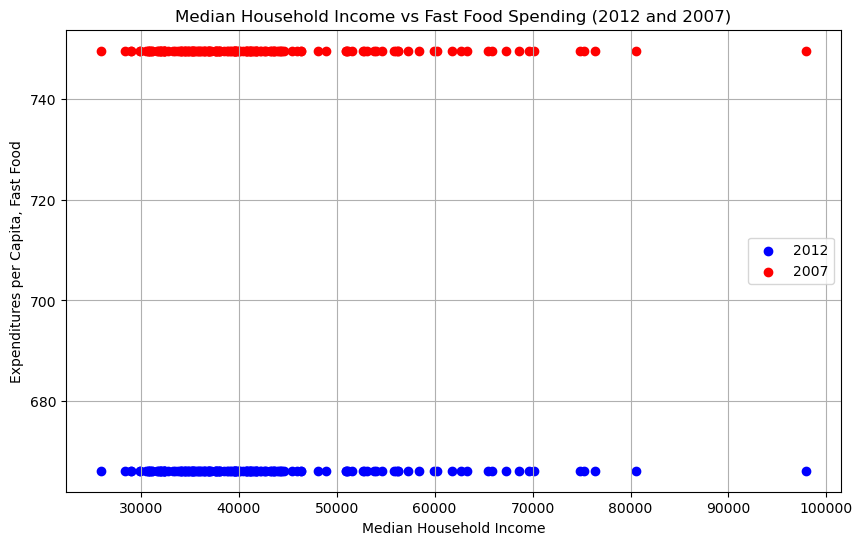

In [14]:
#My question: Does the amount of household Income(Median household income, 2015) correlate with Amount of Fast food consumption?
## Filter for Median Household Income (2015) variable
Median_Household_income = GAcounties[(GAcounties["Variable_Code"] == "MEDHHINC15")]
# Group by County to get the median income for each county
MHI_by_County = Median_Household_income.groupby('County')['Value'].mean()
MHI_by_County
# Now, let's create a DataFrame for Fast Food Consumption
fast_food_spending12_df = GAcounties[GAcounties['Variable_Code'] == 'PC_FFRSALES12']
fast_food_spending07_df = GAcounties[GAcounties['Variable_Code'] == 'PC_FFRSALES07']
# Group by County to get the total fast food consumption for each county
fast_food__spending_by_County12 = fast_food_spending12_df.groupby('County')['Value'].sum()
fast_food__spending_by_County07 = fast_food_spending07_df.groupby('County')['Value'].sum()
# Create a new DataFrame combining median income and fast food consumption
MHI_vs_fast_food_spending_df = pd.DataFrame({
    'Median_Household_Income': MHI_by_County,
    'Expenditures per capita, fast food, 2012': fast_food__spending_by_County12,
    'Expenditures per capita, fast food, 2007': fast_food__spending_by_County07
})
# Plotting a chart
plt.figure(figsize=(10, 6))

# Scatter plot for 2012
plt.scatter(MHI_vs_fast_food_spending_df['Median_Household_Income'], 
            MHI_vs_fast_food_spending_df['Expenditures per capita, fast food, 2012'],
            label='2012', color='blue')

# Scatter plot for 2007
plt.scatter(MHI_vs_fast_food_spending_df['Median_Household_Income'], 
            MHI_vs_fast_food_spending_df['Expenditures per capita, fast food, 2007'],
            label='2007', color='red')

# chart elements
plt.xlabel('Median Household Income')
plt.ylabel('Expenditures per Capita, Fast Food')
plt.title('Median Household Income vs Fast Food Spending (2012 and 2007)')
plt.legend()
plt.grid(True)
plt.show()






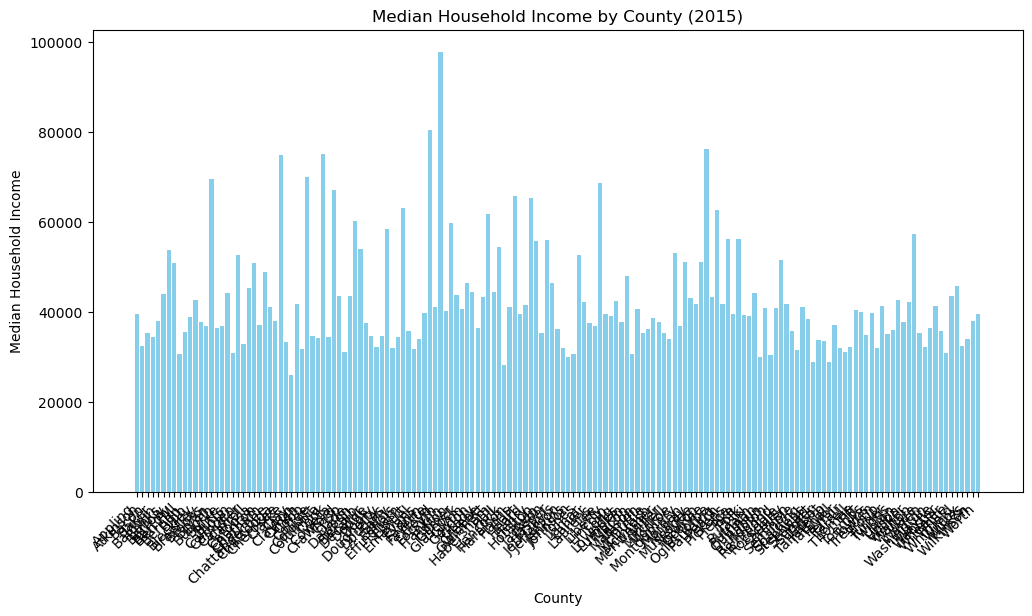

In [16]:

#Visualizing Median Household Income by County (for Georgia demographics?)
# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(MHI_by_County.index, MHI_by_County, color='skyblue')

# Adding labels and title
plt.title('Median Household Income by County (2015)')
plt.xlabel('County')
plt.ylabel('Median Household Income')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the plot

plt.show()


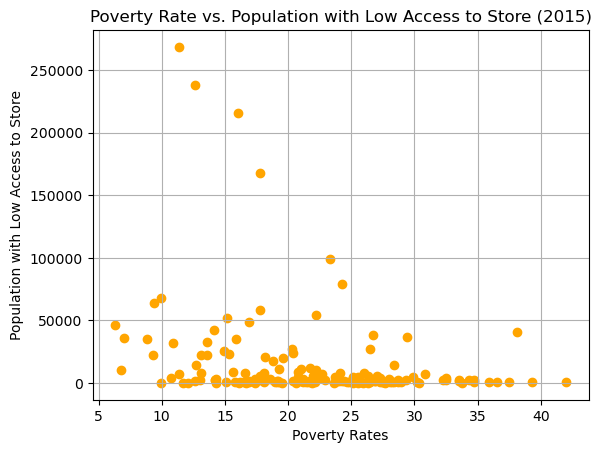

In [20]:
#Relationship in Question: Poverty Rate vs. Population with Low Access to Store (2015)
Poverty_Rate_15 = GAcounties[(GAcounties["Variable_Code"] == "POVRATE15")]
#Population, low access to store, 2015
Lack_of_access15 = GAcounties[(GAcounties["Variable_Code"] == "LACCESS_POP15")]
#SNAP households, low access to store
SNAP_households = GAcounties[(GAcounties["Variable_Code"] == "LACCESS_SNAP15")]


# Group by County to get the average poverty rate for each county
Poverty_Rate_by_County = Poverty_Rate_15.groupby('County')['Value'].mean()
# Group by County to get the total population with low access to stores for each county
Lack_of_access_by_County = Lack_of_access15.groupby('County')['Value'].sum()
# Group by County to get the total SNAP households with low access to stores for each county
SNAP_households_by_County = SNAP_households.groupby('County')['Value'].sum()

# Create a new DataFrame combining poverty rate, lack of access, and SNAP households
Poverty_vs_Access_df = pd.DataFrame({
    'Poverty_Rate': Poverty_Rate_by_County,
    'Population_with_Low_Access': Lack_of_access_by_County,
    'SNAP_Households_with_Low_Access': SNAP_households_by_County
})

# Scatter plot for Poverty Rate vs. Population with Low access
plt.scatter(Poverty_vs_Access_df['Poverty_Rate'], Poverty_vs_Access_df['Population_with_Low_Access'], label='Population Low Access to Store', color='orange')
# Adding labels and title
plt.xlabel('Poverty Rates')
plt.ylabel('Population with Low Access to Store')
plt.title('Poverty Rate vs. Population with Low Access to Store (2015)')
plt.grid(True)

# Display the plot
plt.show()



In [ ]:

#My Question: Population Change over time - for highest and lowerst levels of poverty in 2015 - CC
#Variable Definitions
Poverty_Rate_15 = GAcounties[(GAcounties["Variable_Code"] == "POVRATE15")]

In [ ]:




# # Clean_SNAP_vs_Grocery
# fig, (ax1, ax2) = plt.subplots(2, sharex=True)
# fig.suptitle("Factors Related to Poverty Rate by County", fontsize=16, fontweight="bold")

# ax1.set_xlim(min(Poverty_Rate_Count), max(Poverty_Rate_Count))
# ax1.plot(Poverty_Rate_Count, SNAP_households_Count, linewidth=1, marker="o")
# # ax1.plot(year, pe_fit, "b--", linewidth=1)
# ax1.set_ylabel("SNAP households, low access to store")

# ax2.plot(Poverty_Rate_Count, Lack_of_access_Count, linewidth=1, marker="o", color="y")
# # ax2.plot(year, p_fit, "y--", linewidth=1)
# ax2.set_ylabel("Population, low access to store")


# plt.show()
